# Mini project 1

In [0]:
!pip install tensorflow
!pip install keras


Using TensorFlow backend.


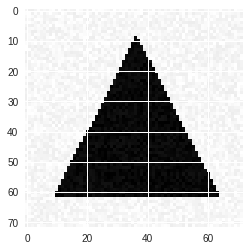

In [1]:
# %load C:\Users\Moncef\Desktop\3A Centrale\MSC AI\Foundations of Deep learning\Project 1\mp1.py
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
      #on indique le nombre de samples generes
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = keras.utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




# Linear classifier 1


Generating a training set of images and transforming Y_train to categorical in order to be able to train a nn with 3 nodes at input layer

In [26]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = keras.utils.to_categorical(Y_train)


Creating data:
0
100
200


Build the model

Some ideas :

* Change the initialization to normal.
* Use sigmoid layers everywhere.
* Normalize your input, e.g. use StandardScaler from scikit learn.
* Increase the initial learning rate and/or choose a different optimizer.
* For debugging purposes, decrease the size of the hidden layer or even remove it
* To avoid high frequency ocsillation in accuracy curve, add momentum and dropout

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras import optimizers

#initialize CNN
model1 = Sequential()

#add layers with random weights following uniform distrib and null biases
model1.add(Dense(3, activation='sigmoid'))
model1.add(Activation('softmax'))


Stochastic gradient descent optimizer and compile

In [0]:
optimizer1 = keras.optimizers.SGD(lr=0.01, momentum=0.1, decay=0.001, nesterov=False)

model1.compile(optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
print(X_train.shape)
print(Y_train.shape)

(300, 5184)
(300, 3)


Train with batch normalization (When using ReLu as activation function the accuracy stays stuck at 0.34 along the epochs. We observe a small improvement when using Sigmoid funtion instead)

In [29]:
history = model1.fit(X_train, Y_train, epochs=30, batch_size = 32)

Epoch 1/30
300/300 [==============================] - 1s 2ms/step - loss: 1.0740 - acc: 0.4233
Epoch 2/30
300/300 [==============================] - 0s 109us/step - loss: 1.0193 - acc: 0.5600
Epoch 3/30
300/300 [==============================] - 0s 107us/step - loss: 0.9725 - acc: 0.6267
Epoch 4/30
300/300 [==============================] - 0s 104us/step - loss: 0.9506 - acc: 0.6167
Epoch 5/30
300/300 [==============================] - 0s 115us/step - loss: 0.9393 - acc: 0.6067
Epoch 6/30
300/300 [==============================] - 0s 100us/step - loss: 0.9063 - acc: 0.7000
Epoch 7/30
300/300 [==============================] - 0s 99us/step - loss: 0.9019 - acc: 0.6633
Epoch 8/30
300/300 [==============================] - 0s 117us/step - loss: 0.8689 - acc: 0.7333
Epoch 9/30
300/300 [==============================] - 0s 101us/step - loss: 0.8646 - acc: 0.7367
Epoch 10/30
300/300 [==============================] - 0s 104us/step - loss: 0.8502 - acc: 0.7633
Epoch 11/30
300/300 [===========

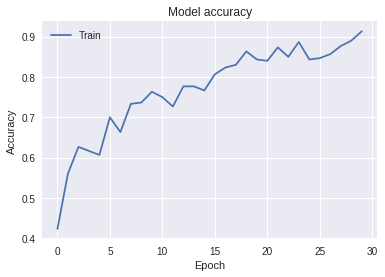

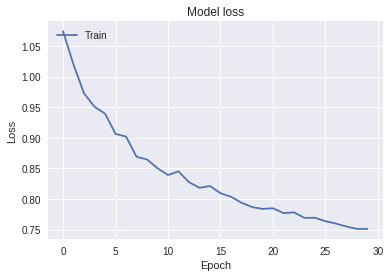

In [30]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Linear classifier 2

Build a second model with adam optimizer

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras import optimizers

#initialize CNN
model2 = Sequential()

#add layers
model2.add(Dense(3, activation='sigmoid'))
model2.add(Activation('softmax'))


Adam optimizer and compile

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train with batch normalization

In [37]:
history = model2.fit(X_train, Y_train, epochs=20, batch_size = 32)

Epoch 1/20
300/300 [==============================] - 0s 575us/step - loss: 1.0255 - acc: 0.4667
Epoch 2/20
300/300 [==============================] - 0s 119us/step - loss: 0.8704 - acc: 0.7000
Epoch 3/20
300/300 [==============================] - 0s 106us/step - loss: 0.8150 - acc: 0.7633
Epoch 4/20
300/300 [==============================] - 0s 119us/step - loss: 0.7914 - acc: 0.7800
Epoch 5/20
300/300 [==============================] - 0s 112us/step - loss: 0.7461 - acc: 0.8533
Epoch 6/20
300/300 [==============================] - 0s 111us/step - loss: 0.7104 - acc: 0.9433
Epoch 7/20
300/300 [==============================] - 0s 116us/step - loss: 0.6948 - acc: 0.9500
Epoch 8/20
300/300 [==============================] - 0s 106us/step - loss: 0.6870 - acc: 0.9300
Epoch 9/20
300/300 [==============================] - 0s 106us/step - loss: 0.6789 - acc: 0.9333
Epoch 10/20
300/300 [==============================] - 0s 97us/step - loss: 0.6938 - acc: 0.8700
Epoch 11/20
300/300 [=========

Plot accuracy and loss function of model2 which uses Adam optimizer

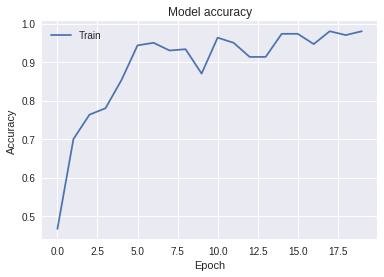

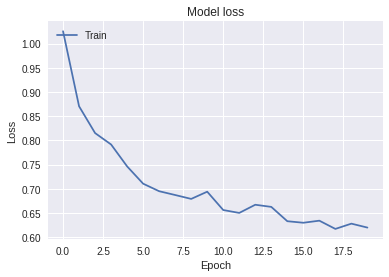

In [38]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Check the models with a rectangle and disk

In [0]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)

array([[0.3618299 , 0.35405597, 0.2841141 ]], dtype=float32)

In [0]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)

array([[0.35949084, 0.35397413, 0.28653505]], dtype=float32)

Visualize prediction

# Visualization of the weights of both models

**Model 1**

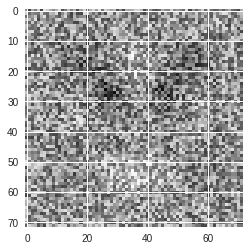

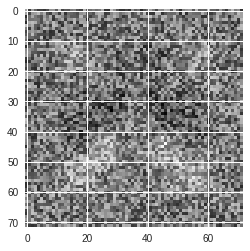

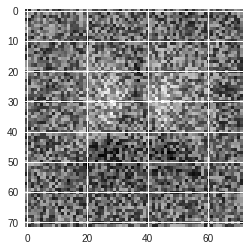

In [40]:
import matplotlib.pyplot as plt
import numpy as np
weights1 = model1.get_weights()
weights2 = model2.get_weights()

#rectangle
plt.figure()
Column1 = np.reshape(weights1[0][:,0], (-1,72))
plt.imshow(Column1, cmap='gray')

#disk
plt.figure()
Column2 = np.reshape(weights1[0][:,1], (-1,72))
plt.imshow(Column2, cmap='gray')

#triangle
plt.figure()
Column3 = np.reshape(weights1[0][:,2], (-1,72))
plt.imshow(Column3, cmap='gray')

**Model 2**
It appears that the geometric forms that we want to detect are represented in ou weights vizualization

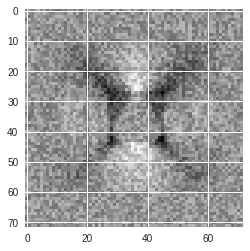

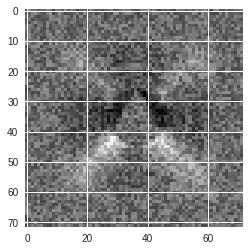

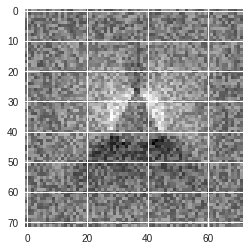

In [41]:
#model2
#rectangle
plt.figure()
Column_a = np.reshape(weights2[0][:,0], (-1,72))
plt.imshow(Column_a, cmap='gray')

#disk
plt.figure()
Column_b = np.reshape(weights2[0][:,1], (-1,72))
plt.imshow(Column_b, cmap='gray')

#triangle
plt.figure()
Column_c = np.reshape(weights2[0][:,2], (-1,72))
plt.imshow(Column_c, cmap='gray')

#A more difficult classification problem

Generate sets with moving shapes and variant dimensions

In [42]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
#reshaping X_train and Y_train
Y_train = keras.utils.to_categorical(Y_train)
X_train = X_train.reshape((300, 72, 72, 1))

[X_test, Y_test] = generate_test_set_classification()
#reshaping X_test and Y_test
Y_test = keras.utils.to_categorical(Y_test)
X_test = X_test.reshape((300, 72, 72, 1))



Creating data:
0
100
200
Creating data:
0
100
200


In [0]:
X_train.shape[0]

(300, 72, 72, 1)

5-Creating and train a Convolutional NN

Epoch 1/50
300/300 [==============================] - 2s 7ms/step - loss: 1.1066 - acc: 0.3267
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 1.0857 - acc: 0.4433
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 1.0495 - acc: 0.4333
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 1.0031 - acc: 0.5000
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 0.9586 - acc: 0.5267
Epoch 6/50
300/300 [==============================] - 2s 6ms/step - loss: 0.9369 - acc: 0.5367
Epoch 7/50
300/300 [==============================] - 2s 6ms/step - loss: 0.9087 - acc: 0.5800
Epoch 8/50
300/300 [==============================] - 2s 6ms/step - loss: 0.8740 - acc: 0.5667
Epoch 9/50
300/300 [==============================] - 2s 6ms/step - loss: 0.8454 - acc: 0.5867
Epoch 10/50
300/300 [==============================] - 2s 6ms/step - loss: 0.8155 - acc: 0.5800
Epoch 11/50
300/300 [============================

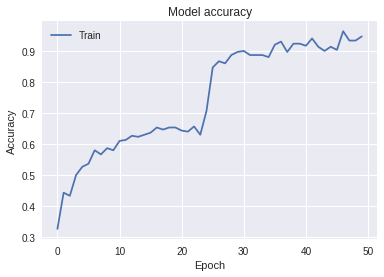

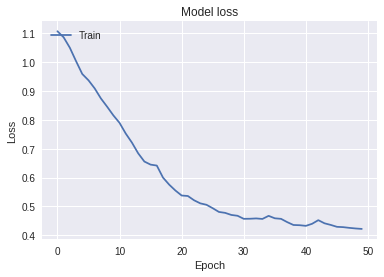

In [43]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import optimizers
import matplotlib.pyplot as plt

#create the model CNN
model4 = Sequential()

#build the CNN
model4.add(Conv2D(16, (5, 5), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(16, (5, 5), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(10, activation='relu'))
model4.add(Dense(3, activation='relu'))
model4.add(Activation('softmax'))

#optimizer
optimizer3 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#compiling
model4.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=['accuracy'])

#training
history = model4.fit(X_train, Y_train, epochs=50, batch_size=32)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#A regression problem


6-Generate train set for regression

In [49]:
[X_train, Y_train] = generate_dataset_regression(300, 0.0)
X_train = X_train.reshape(300,72,72,1)

[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(300,72,72,1)

Creating data:
0
100
200
Creating data:
0
100
200


**Sorting the Input data (train and test) by decreasing x_coordinate to help the NN learn triangles vertices in the same way for each instance in the dataset**

In [0]:
Y_train_sorted = np.zeros(Y_train.shape)
Y_test_sorted = np.zeros(Y_test.shape)

def x_coordinate(Y):
  return Y[0]
  
for i in range(len(Y_train)):
    Y_train_sorted[i] = np.array(sorted(Y_train[i].reshape(3,2), key = x_coordinate)).reshape(6)
    
for i in range(len(Y_test)):
    Y_test_sorted[i] = np.array(sorted(Y_test[i].reshape(3,2), key = x_coordinate)).reshape(6)



Training a regressor to determine triangle shapes position

In [51]:
from keras.layers.core import Dropout
model_regression = Sequential()


model_regression.add(Conv2D(32, kernel_size = (3,3),  input_shape = (72,72,1)))
model_regression.add(MaxPooling2D(pool_size=(3, 3)))
model_regression.add(Conv2D(64, kernel_size = (3,3)))
model_regression.add(MaxPooling2D(pool_size=(3, 3)))

model_regression.add(Flatten())

model_regression.add(Dense(128, activation='relu'))
model_regression.add( Dropout(0.2))
model_regression.add(Dense(6, activation='sigmoid'))


model_regression.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mse'])

model_regression.fit(X_train, Y_train_sorted, epochs=20, batch_size = 32)


Epoch 1/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 8/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 10/2

Vizualize results

300/300 [==============================] - 1s 2ms/step


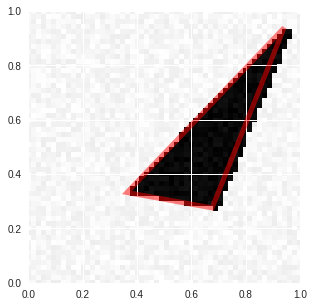

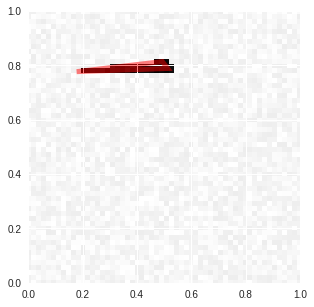

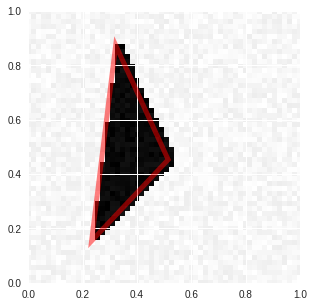

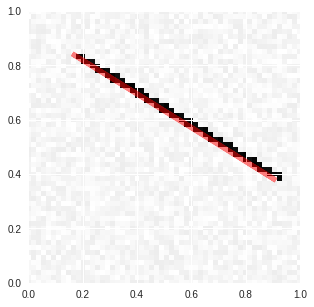

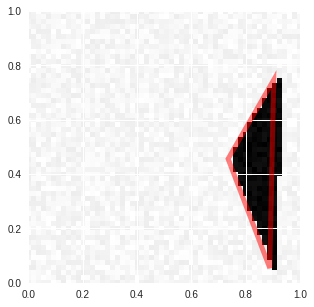

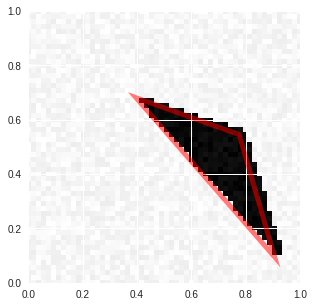

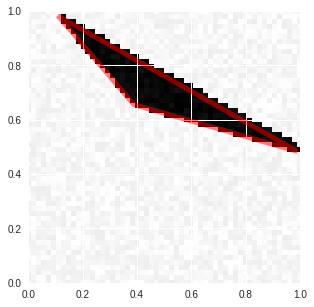

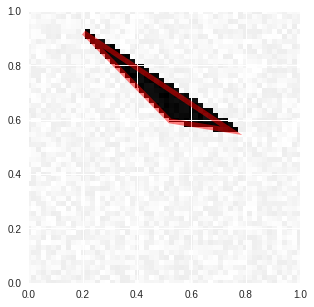

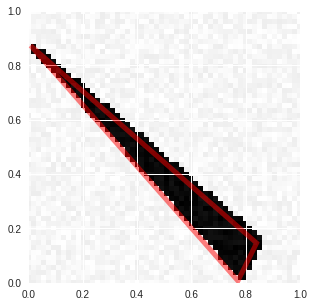

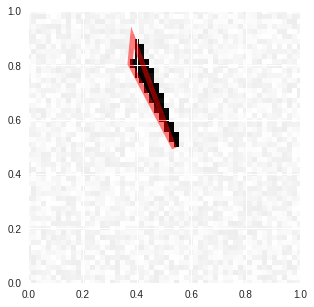

In [53]:
model_regression.evaluate(X_test, Y_test)
for i in range(10):
    visualize_prediction(X_test[i], Y_test_sorted[i])

#Image denoising

**In generate the data set, i used the same function given in the project code and modified it to generate noised images to be used as train input data and clean images to be used as train target data**

In [0]:
def generate_2_drawings(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata_clean = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata_clean + noise * np.random.random(imdata_clean.size)
    plt.close(fig)
    return imdata_noise, imdata_clean

def generate_2_rectangles(noise, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_2_drawings(figsize, U, V, noise)

def generate_two_datasets(nb_samples, noise, free_location=False):
    X_noise = np.zeros((nb_samples,5184))
    X_clean = np.zeros((nb_samples,5184))
    for i in range(nb_samples):
        X_noise[i], X_clean[i] = generate_2_rectangles(noise, free_location)
    return X_noise, X_clean


In [0]:
#train_set
[X_noise_train, X_clean_train] = generate_two_datasets(300, 20)
X_noise_train = X_noise_train.reshape(300,72,72,1)
X_clean_train = X_clean_train.reshape(300,72,72,1)


#test_set
[X_noise_test, X_clean_test] = generate_two_datasets(300, 20)
X_noise_test = X_noise_test.reshape(300,72,72,1)
X_clean_test = X_clean_test.reshape(300,72,72,1)



**Autoencoder to denoise the images**
I used an hourglass network 

In [155]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
auto_encoder = Sequential()


auto_encoder.add(Conv2D(64, kernel_size = (3, 3), activation='relu', padding='same',  input_shape = (72,72,1)))
auto_encoder.add(Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same'))
auto_encoder.add(MaxPooling2D(pool_size= (2, 2)))

auto_encoder.add(Conv2D(16, kernel_size = (3, 3),activation='relu', padding='same'))
auto_encoder.add(UpSampling2D(size = (2, 2)))
auto_encoder.add(Conv2D(32, kernel_size = (3, 3),activation='relu', padding='same'))
auto_encoder.add(Conv2D(64, kernel_size = (3, 3), activation='relu',padding='same'))

auto_encoder.add(Conv2D(1, kernel_size = (3, 3),activation='relu', padding='same'))

#compiling
auto_encoder.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mse'])

history = auto_encoder.fit(X_noise_train, X_clean_train, epochs= 10, batch_size = 32, validation_data = (X_noise_test, X_clean_test))


Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 28s 93ms/step - loss: 16503.0112 - mean_squared_error: 16502.9592 - val_loss: 7296.4895 - val_mean_squared_error: 7296.4911
Epoch 2/10
300/300 [==============================] - 26s 87ms/step - loss: 5139.0687 - mean_squared_error: 5139.0685 - val_loss: 2764.7345 - val_mean_squared_error: 2764.7353
Epoch 3/10
300/300 [==============================] - 26s 86ms/step - loss: 2262.6351 - mean_squared_error: 2262.6330 - val_loss: 1461.9767 - val_mean_squared_error: 1461.9521
Epoch 4/10
300/300 [==============================] - 26s 86ms/step - loss: 1198.0921 - mean_squared_error: 1198.0881 - val_loss: 851.1649 - val_mean_squared_error: 851.1644
Epoch 5/10
300/300 [==============================] - 26s 86ms/step - loss: 664.6009 - mean_squared_error: 664.5993 - val_loss: 425.1801 - val_mean_squared_error: 425.1771
Epoch 6/10
300/300 [==============================] - 26s 87ms/step - loss: 34

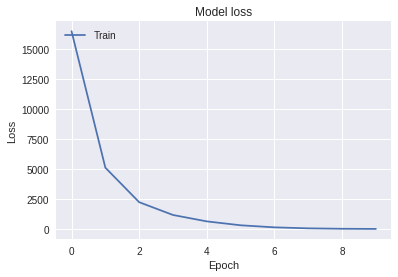

In [156]:
# Plot MSE
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Vizualizing results of denoising

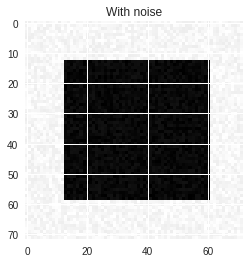

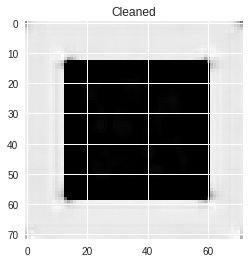

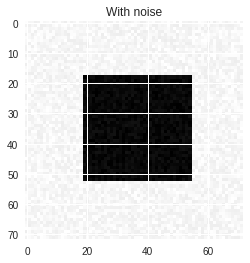

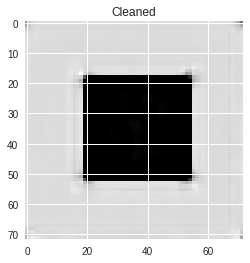

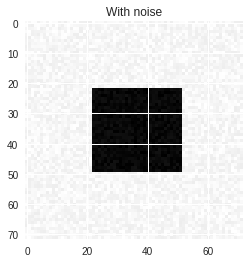

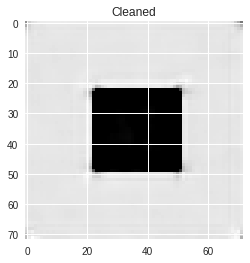

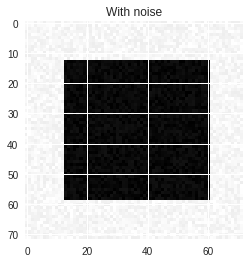

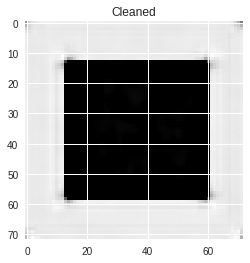

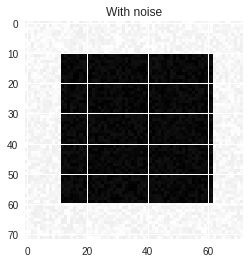

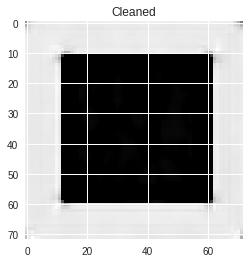

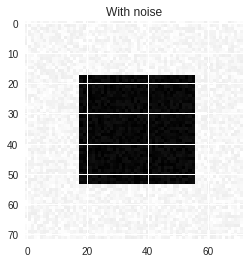

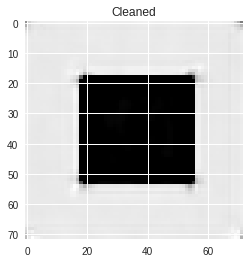

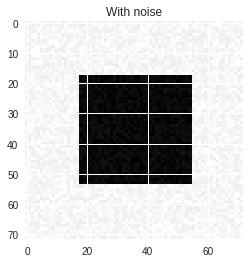

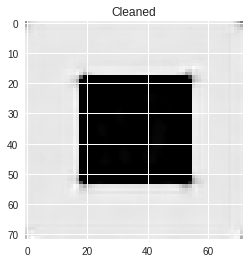

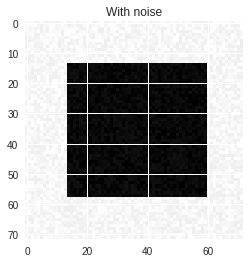

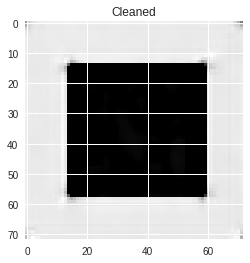

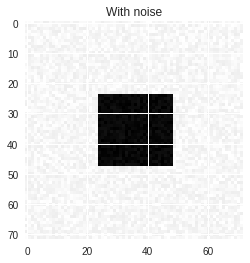

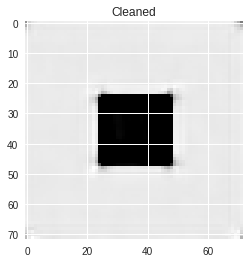

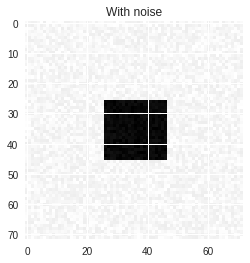

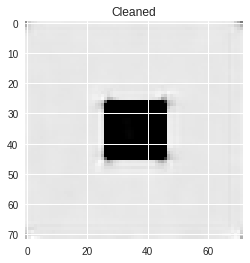

In [157]:
X_clean_predicted = auto_encoder.predict(X_noise_test)
for i in range(10):
    plt.imshow(X_noise_test[i, :, :, 0],  cmap='gray')
    plt.title('With noise')
    plt.show()
    
    plt.imshow(X_clean_predicted[i, :, :, 0],  cmap='gray')
    plt.title('Cleaned')
    plt.show()